Numerous details on residences in California are included in the california_housing.csv file, such as housing median age, total rooms, total bedrooms, population, median income among other important details. Regression will be used to anticipate the value of the house based on a variety of parameters highlighted below.

In [3]:
import pandas as pd
import numpy as np

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
house_data = pd.read_csv('/content/drive/MyDrive/california_housing.csv')
house_data.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)
house_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
19995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
19996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
19997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
19998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
features = house_data.columns.to_list()[:-1] # The names of the houses will be displayed here
X = house_data[features] 
Y = house_data['median_house_value']

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [49]:
from sklearn.linear_model import LinearRegression
my_linear_regression = LinearRegression()
my_linear_regression.fit(X_train, Y_train) 

LinearRegression()

For the LinearRegression input above, please try loading this page using  nbviewer.org as the HTML representation on GitHub fails to render.

In [51]:
pred = my_linear_regression.predict(X_test)
pred

array([249074.2339777 ,  67429.35551381, 103466.87085187, ...,
       319063.94385354,  61928.32004022, 298212.23633466])

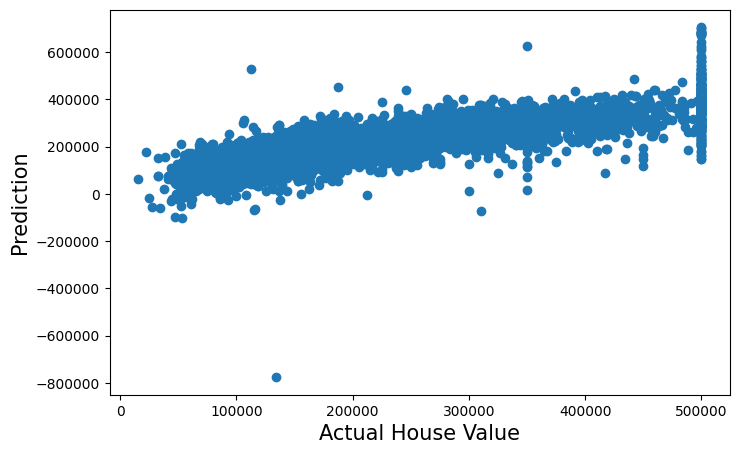

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 5))
plt.scatter(x = Y_test, y = pred, color = 'Tab:blue')
plt.xlabel('Actual House Value', fontsize = 15)
plt.ylabel('Prediction', fontsize = 15)
plt.show()

In [60]:
print("R^2 =", my_linear_regression.score(X_train, Y_train))

R^2 = 0.6395311942579177


In [61]:
print('The intercept (b_0) is  {}'.format(my_linear_regression.intercept_))
print('The coef (b_1) is  {}'.format(my_linear_regression.coef_[0]))
print('The coef (b_2) is  {}'.format(my_linear_regression.coef_[1]))

The intercept (b_0) is  -3573609.8307387773
The coef (b_1) is  -42699.97834623054
The coef (b_2) is  -42720.951500028095


In [62]:
house_value_pred = my_linear_regression.predict(X_test)
house_value_pred 

array([249074.2339777 ,  67429.35551381, 103466.87085187, ...,
       319063.94385354,  61928.32004022, 298212.23633466])

In [63]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, house_value_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, house_value_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, house_value_pred)))

Mean Absolute Error: 50374.121297888785
Mean Squared Error: 4847397446.398424
Root Mean Squared Error: 69623.25363266518


In [64]:
def MAPE(Y, pred): # MAPE: Mean Abs Percentage Error
  l1 = list(Y)
  l2 = list(pred)
  er = []
  for i in range(len(l1)):
    e = np.abs(l1[i]-l2[i])
    er.append(e/l1[i])
  return np.mean(er)
print('MAPE:', MAPE(Y_test, house_value_pred)*100, "%")

MAPE: 29.67005223635856 %


In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(house_data)
df_norm = pd.DataFrame(data_norm, columns = house_data.columns.to_list())

In [67]:
from sklearn.linear_model import LinearRegression
my_linear_regression = LinearRegression()
X = df_norm[features] # House features
Y = df_norm['median_house_value'] # This is defined as the target or response variable
my_linear_regression.fit(X, Y)

LinearRegression()

For the LinearRegression input above, please try loading this page using  nbviewer.org as the HTML representation on GitHub fails to render.

In [68]:
summary = pd.DataFrame({'Features':features, 'Scores':my_linear_regression.coef_})
summary

,Features,Scores
0,longitude,-0.892046
1,latitude,-0.830818
2,housing_median_age,0.121552
3,total_rooms,-0.654970
4,total_bedrooms,1.518356
5,population,-2.813896
6,households,0.599498
7,median_income,1.206688


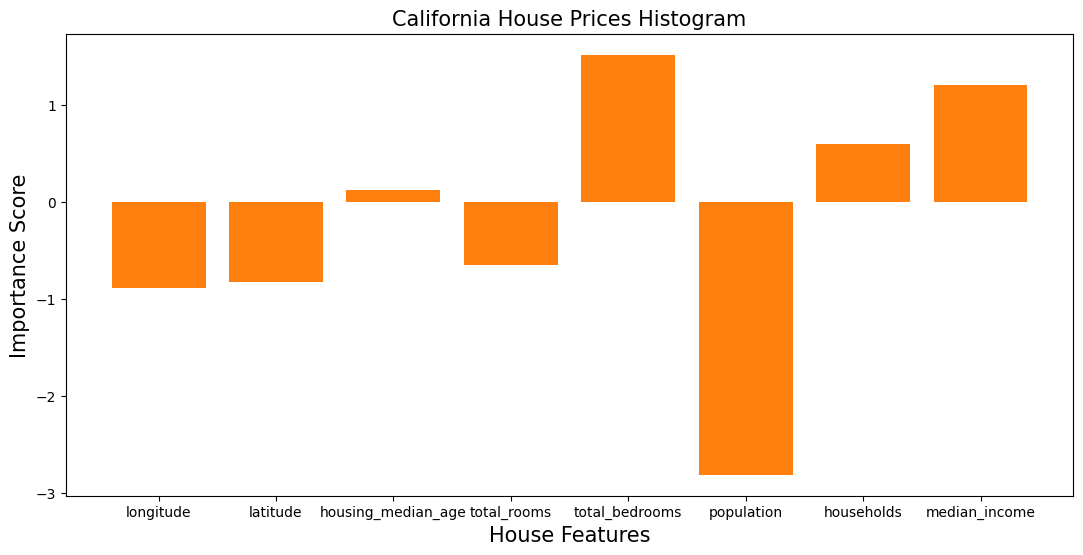

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13, 6))
# Bar chart that contains importance score including features for all Californian houses within the dataset provided.
plt.bar(x = summary['Features'], height = summary['Scores'] , color = 'Tab:orange') 
plt.title('California House Prices Histogram', fontsize = 15)
plt.xlabel('House Features', fontsize = 15)
plt.ylabel('Importance Score', fontsize = 15)
plt.show()

The amount of the dependent variable's variation that the independent variables account for as a whole is expressed as an R-squared value. Longitude, latitude, housing median age, number of rooms, number of beds, population, households, and median income may therefore each account for 63% of the variance in property prices.

The MAE reveals the average size of the forecast error that we may anticipate. This dataset's average difference between forecasts and actuals is $50,374.12

According to the plot above, the latitude and longitude don't play an important role for Californian houses as much as other features such as population and total bedrooms do.

Using the dataset's intended goals as a guide, MAPE displays the average percent difference between forecasts and those targets. In this case, the projections were normally 29.6% off, which is considered to be a respectable value.

As a medium ground between low influencing scoring characteristics like longitude and latitude and high influencing scoring features like population and total bedrooms, features households and median income both play an acceptable role. 